Delattre Damien. Matricule ulb: 000425862

# Brownian Motion.




## 1. Introduction.

Pour ce travail, je répondrai aux questions ainsi qu' aux "Challenges" du dossier "MonteCarlo" du MOOC.

Le but de ce MOOC est d'expliquer la diffusion d'un liquide dans un autre par le mouvement brownien mais aussi de nous faire comprendre comment sont générés les nombres aléatoires.

#### Remarque 

Pour que le code de ce notebook fonctionne correctement, il est impératif de le faire tourner dans l'ordre car les mêmes variables reviennent plusieurs fois !

Commençons par importer quelques librairies python dont nous aurons besoin.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## 2. Random Numbers.

La première question du notebook "Random Numbers" consiste à vérifier que lorsqu'on augmente le nombre de valeurs aléatoires et qu'on diminue la taille des bins, la fréquence d'obtention d'un nombre aléatoire converge vers la distribution de probabilité des nombres aléatoires. Essayons avec une distribution uniforme.

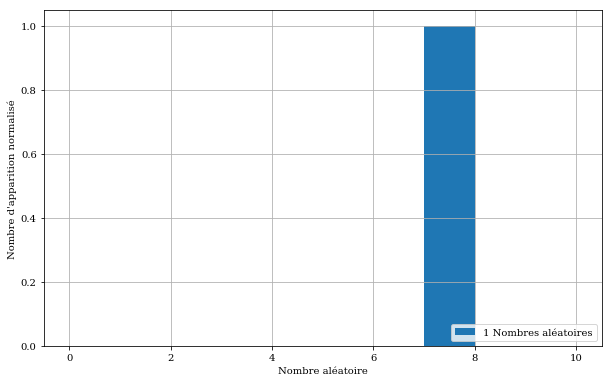

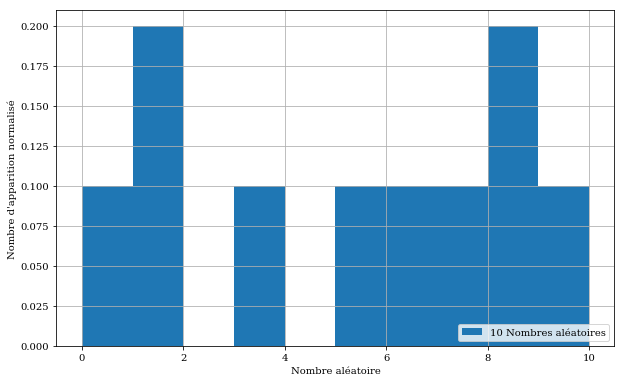

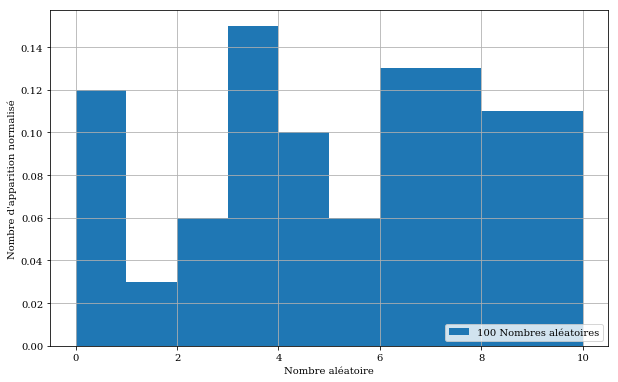

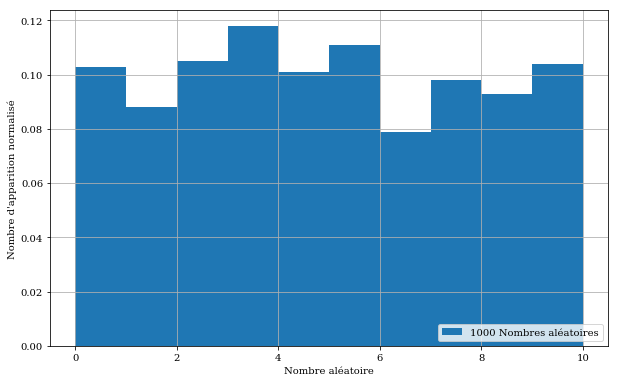

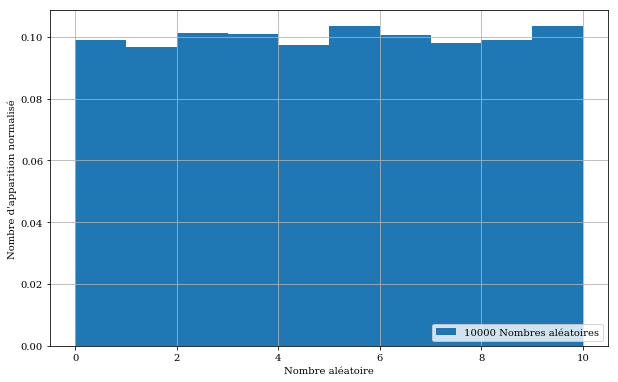

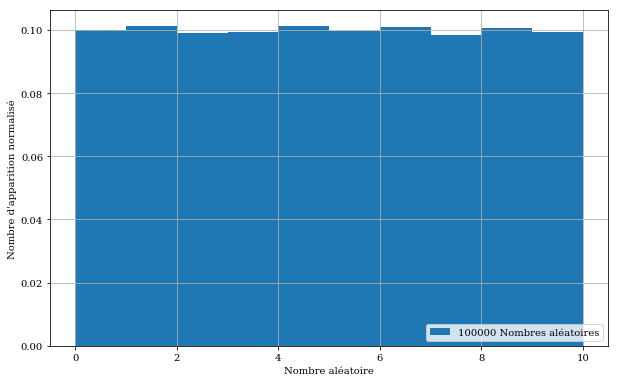

In [2]:
a=0
b=10

for i in range(6):
    x = np.random.random_sample(np.power(10,i))
    y = (b-a)*x+a

    fig, ax = plt.subplots(figsize=(10,10/1.618))
    plt.grid()
    plt.hist(y,bins=np.linspace(0,10,11),density=True,label="%i Nombres aléatoires" %len(x))
    ax.set_xlabel("Nombre aléatoire")
    ax.set_ylabel("Nombre d'apparition normalisé")
    plt.legend(loc=4)
    plt.show()

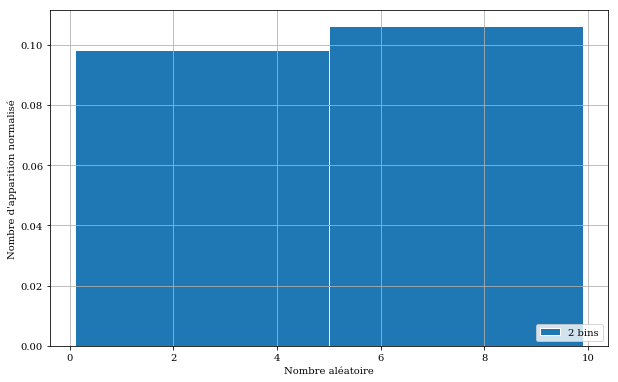

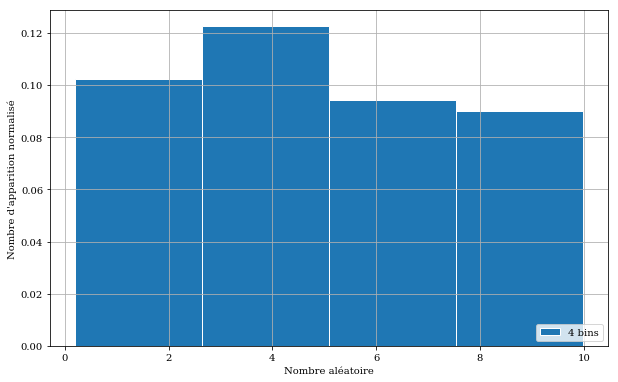

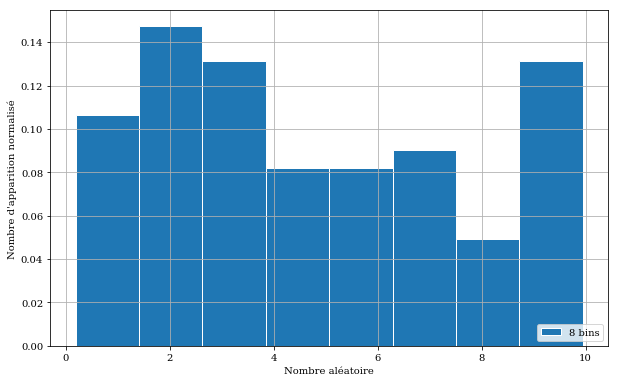

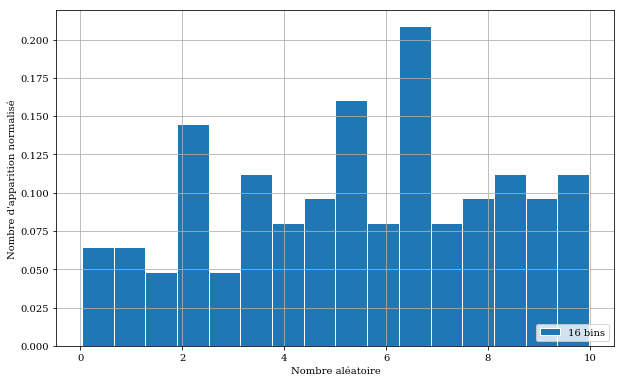

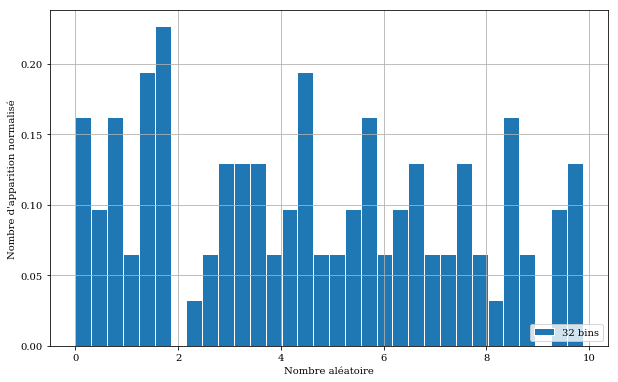

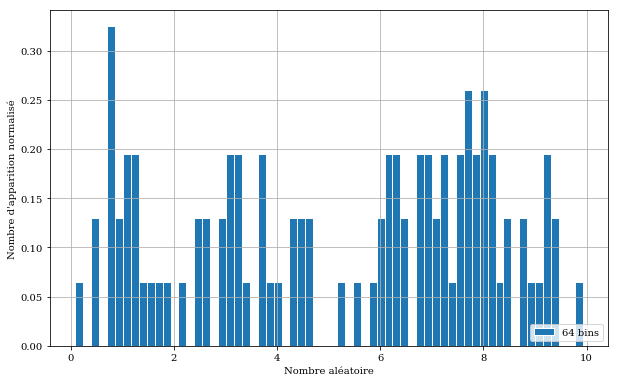

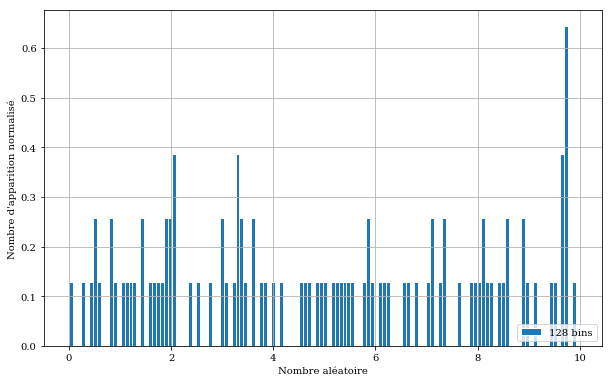

In [3]:
for i in range(1,8):
    x = np.random.random_sample(100)
    y = (b-a)*x+a

    fig, ax = plt.subplots(figsize=(10,10/1.618))
    plt.grid()
    plt.hist(y, bins=np.power(2,i),density=True,label="%i bins" %np.power(2,i),ec="w")
    ax.set_xlabel("Nombre aléatoire")
    ax.set_ylabel("Nombre d'apparition normalisé")
    plt.legend(loc=4)
    plt.show()

On constate bien que quand le nombre d'événements augmente et que la taille des bins diminue, la fréquence d'apparition des nombres aléatoires tends vers la densité de probabilité de la distribution uniforme, à savoir 
$$
p(x) = 
\begin{cases} \frac{1}{b-a} = 0.1 &\mbox{si } x\in [a,b] \\ 
0 & \mbox{sinon. } 
\end{cases} 
$$

### 2.1 Générer des nombres aléatoires avec python.

Il existe plusieur façons de générer des nombres aléatoires suivant une distribution donnée avec python.
Pour générer une distributuion exponentielle, on peut soit utiliser la fonction "random.exponential" de la bibliothèque Numpy, soit la méthode la transformation inverse expliquée dans le MOOC. Cette méthode consiste à générer uniformément des nombres aléatoires dans l'intervalle $[0,1]$. Puis, on transforme ces nombres en inversant la fonction cumulative de la distribution qu'on souhaite obtenir. Cette méthode fonctionne bien pour les fonctions analytiques comme l'exponentielle.

Appliquons la transformée inverse à l'exponentielle. la distribution exponentielle est donnée par

$$
p(x)=
\begin{cases} 
\alpha e^{-\alpha x} &\mbox{si } x\geq 0 \\
0 &\mbox{si } x<0
\end{cases} 
$$

Soit $X$, une variable aléatoire distribuée uniformément sur $[0,1]$. La fonction cumulative de la distribution exponentielle est donnée par 

$$F(x) = \int_{-\infty}^x p(x) dx = 
\begin{cases} 
1 - e^{-\alpha x} &\mbox{si } x\geq 0 \\
0 &\mbox{si } x<0
\end{cases} $$
La fonction inverse est donc
$$
F^{-1}(x) = -\frac{1}{\alpha}\log(1-x).
$$

La méthode de la transformée inverse dit alors qu'on a $$Y = F^{-1}(X)$$ où $Y$ est une variable aléatoire d'une distribution exponentielle.

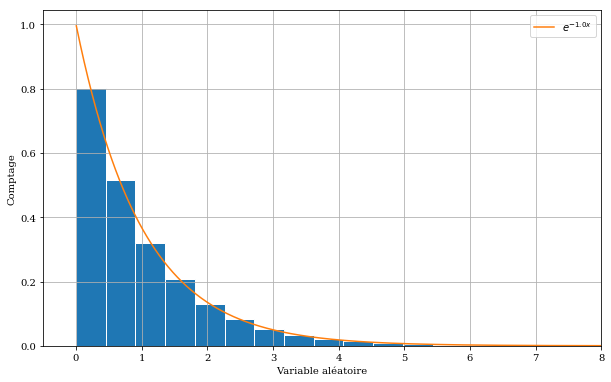

In [4]:
#Implémentation de la méthode de la transformée inverse pour une distribution exponentielle.

alpha = 1
N = 100000
x = np.random.random_sample(N)
yinv = -1/alpha*np.log(1-x)

#Histogramme de la variable aléatoire.

fig, ax = plt.subplots(figsize=(10,10/1.618))
plt.grid()
plt.hist(yinv,bins=25,density=True,ec="w")
ax.set_xlabel("Variable aléatoire")
ax.set_ylabel("Comptage")
ax.set_xlim(-1/2,8)

#Fonction exponentielle "théorique".

a=np.linspace(np.min(y),np.max(y),1000)
ax.plot(a, np.exp(-alpha*a), label="$e^{-%.1f x}$"%alpha)
plt.legend()
plt.show()

On peut comparer ce résultat avec celui obtenu par le générateur de nombre aléatoire en distribution exponentielle de numpy.

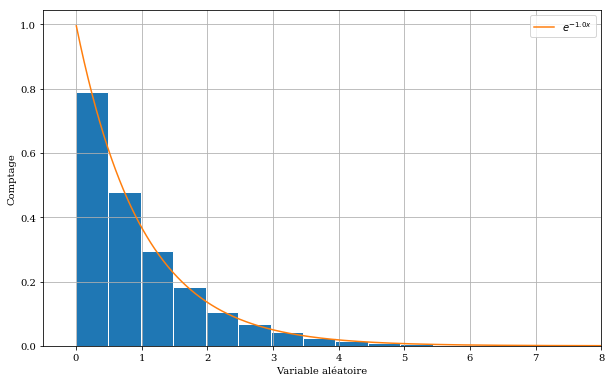

In [5]:
#Génération de nombres aléatoires exponentiels

ynp = np.random.exponential(alpha,N)

#Histogramme des nombres générés.

fig, ax = plt.subplots(figsize=(10,10/1.618))
plt.grid()
plt.hist(ynp,bins=25,density=True,ec="w")
ax.set_xlabel("Variable aléatoire")
ax.set_ylabel("Comptage")
ax.set_xlim(-1/2,8)

#Fonction exponentielle "théorique".

ax.plot(a, np.exp(-alpha*a), label="$e^{-%.1f x}$"%alpha)
plt.legend()
plt.show()

On peut déja constater des différences en regardant les deux histogrammes mais pour déterminer quelle méthode est la "meilleure", on peut s'intéresser à moyenne de nos deux histogrammes.

In [6]:
moyenneinv = np.mean(yinv)
moyennenp = np.mean(ynp)

print("Moyenne de la méthode de la transformée inverse:", moyenneinv)
print("Moyenne du générateur de nombres aléatoires de numpy:", moyennenp)

Moyenne de la méthode de la transformée inverse: 1.0001911214541588
Moyenne du générateur de nombres aléatoires de numpy: 1.0033424732580938


La moyenne (ou espérence) théorique de la distribution exponentielle est donnée par

$$ \mu (y) = \frac{1}{\alpha} = 1 \ \mbox{dans notre cas.} $$

La moyenne des deux générateurs est très proche de la valeur théorique et la méthode la plus proche de 1 change d'une itération à l'autre. Ceci indique qu' a priori les deux méthodes se valent. Pour déterminer le "meilleur" générateur on pourrait exécuter un grand nombre de fois les deux méthodes pour voir statistiquement laquelle est la plus proche de 1.

Regardons maintenant la distribution Gaussienne. La distribution gaussienne est donée par 

$$
p(x)=\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac12 (\frac{x-\mu}{\sigma})^2},
$$

où $\mu$ est la moyenne et $\sigma$ est l'écart-type de la distribution.

Pour générer des nombres aléatoires qui suivent une distribution gaussienne, on peut utiliser soit le générateur de numpy "random.normal" soit utiliser la méthode de la rejection de Von Neumann qui est expliquée dans le MOOC. Cette méthode consiste à générer des nombres aléatoires suivant une distribution exponentielle, puis générer des nombres aléatoires distribués uniformément dans $[0,1]$. Enfin, on garde dans l'ensemble final les nombres aléatoires tels que 

$$
U<\frac{p_2(x)}{Kp_1(x)}
$$

où $p_1(x)$ est une distribution exponentielle et $p_2(x)$ est la distribution gaussienne.

Taille de l'ensemble final: 714063
Taille attendue: 714285.7142857143


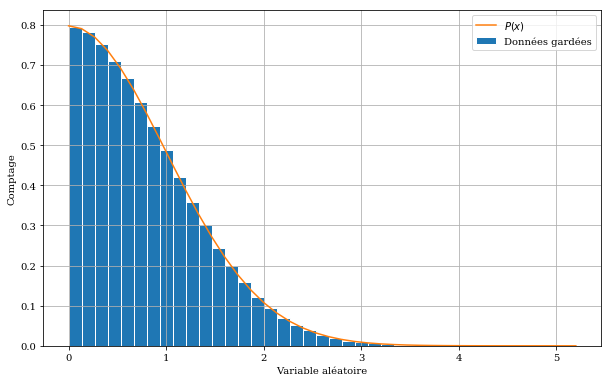

In [7]:
#Implémentation de la méthode de rejection de Von Neumann

#Assignation des constantes

N = 1000000
K = 1.4
alpha = 1
mu = 0
sigma = 1

#nombres aléatoires exponentiels

g = np.random.exponential(alpha,N)
    
#Nombres aléatoires uniformes

U = np.random.random_sample(N)
    
#probabilités normalisées
    
p1 = alpha*np.exp(-alpha*g)
p2 = 2/np.sqrt(2*np.pi*sigma)*np.exp(-(g-mu)**2/(2*sigma**2))

   
#Condition
  
ratio = p2 / (K*p1)   
select = np.where(U < ratio)
    
#liste finale

yvn = g[select]

#taille de l'ensemble accepté

print("Taille de l'ensemble final:", len(yvn))
print("Taille attendue:", N/K)

#Histogramme

fig, ax = plt.subplots(figsize=(10,10/1.618))
plt.grid()
bins=np.linspace(np.min(yvn),np.max(yvn),40)
plt.hist(yvn,bins=bins,density=True,ec="w",label="Données gardées")
ax.set_xlabel("Variable aléatoire")
ax.set_ylabel("Comptage")
#ax.set_xlim(-1/2,8)

#Fonction exponentielle "théorique".

ax.plot(bins, 2/np.sqrt(2*np.pi*sigma)*np.exp(-(bins-mu)**2/(2*sigma**2)), label="$P(x)$")
plt.legend()
plt.show()

On voit que l'histogramme est très proche de la distribution gaussienne. Un autre moyen de générer des nombres aléatoires suivant une distribution gaussienne est d'utiliser le générateur de numpy.

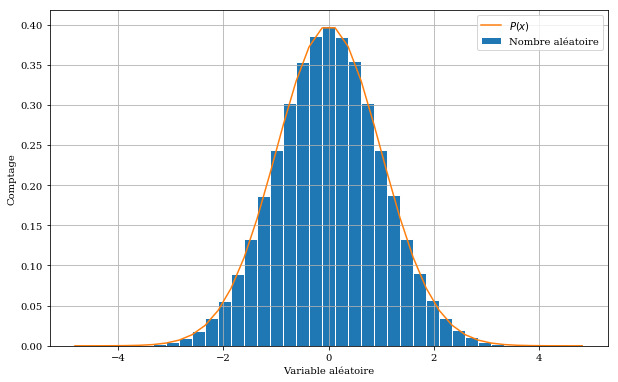

In [8]:
#Génération de nombres aléatoires gaussiens

npy = np.random.normal(mu,sigma,N)

#Histogramme

fig, ax = plt.subplots(figsize=(10,10/1.618))
plt.grid()
bins=np.linspace(np.min(npy),np.max(npy),40)
plt.hist(npy,bins=bins,density=True,ec="w",label="Nombre aléatoire")
ax.set_xlabel("Variable aléatoire")
ax.set_ylabel("Comptage")
#ax.set_xlim(-1/2,8)

#Fonction exponentielle "théorique".

ax.plot(bins, 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(bins-mu)**2/(2*sigma**2)), label="$P(x)$")
plt.legend()
plt.show()

En regardant les histogrammes, on voit bien qu'ils sont très proches des distributions théoriques. Comme la méthode de Von Neumann ne génère "qu'une moitier" de la gaussienne, ce n'est pas évident de les comparer numériquement. Néanmoins, comme le générateur de numpy génère "toute" la gaussienne, je l'estime "meilleur".

### 2.2 Algorithme de Box-Muller

La transformation de Box-Muller est un moyen de générer une distribution normale centrée réduite à partir de deux variables aléatoires $X_1$ et $X_2$ uniformes sur $]0,1]$.

$$
Y_1 = \sqrt{-2ln(X_1)}cos(2\pi X_2) \\
Y_2 = \sqrt{-2ln(X_1)}sin(2\pi X_2)
$$

Alors $Y_1$ et $Y_2$ sont deux variables aléatoires qui suivent une loi normale centrée réduite.

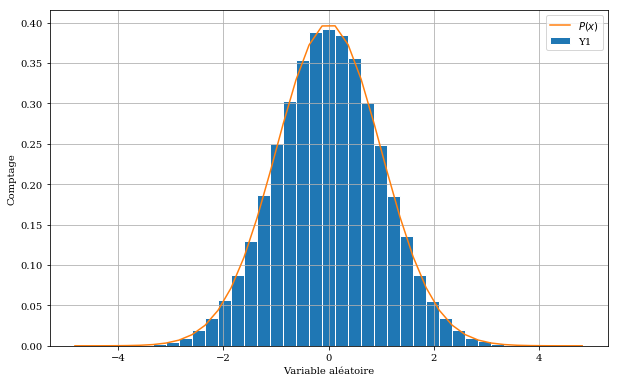

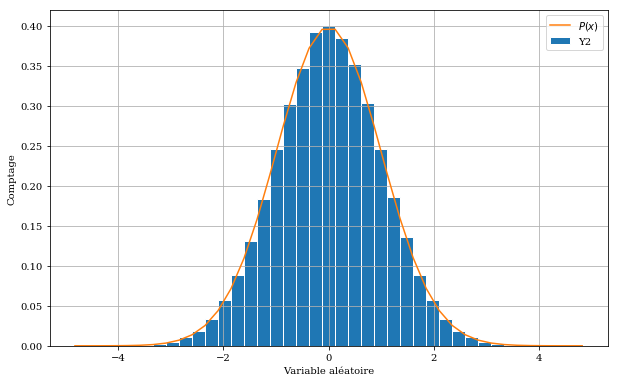

In [9]:
#Algorithme de box-muller.

#Variables aléatoires uniformes
X1 = np.random.random_sample(100000)
X2 = np.random.random_sample(100000)

# Définition des variables transformées
Y1bm = np.sqrt(-2*np.log(X1))*np.cos(2*np.pi*X2)
Y2bm = np.sqrt(-2*np.log(X1))*np.sin(2*np.pi*X2)

#Histogramme1

fig, ax = plt.subplots(figsize=(10,10/1.618))
plt.grid()
bins=np.linspace(np.min(npy),np.max(npy),40)
plt.hist(Y1bm,bins=bins,density=True,ec="w",label="Y1")
ax.set_xlabel("Variable aléatoire")
ax.set_ylabel("Comptage")
#ax.set_xlim(-1/2,8)

#Fonction exponentielle "théorique".

ax.plot(bins, 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(bins-mu)**2/(2*sigma**2)), label="$P(x)$")
plt.legend()
plt.show()

#Histogramme

fig, ax = plt.subplots(figsize=(10,10/1.618))
plt.grid()
bins=np.linspace(np.min(npy),np.max(npy),40)
plt.hist(Y2bm,bins=bins,density=True,ec="w",label="Y2")
ax.set_xlabel("Variable aléatoire")
ax.set_ylabel("Comptage")
#ax.set_xlim(-1/2,8)

#Fonction exponentielle "théorique".

ax.plot(bins, 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(bins-mu)**2/(2*sigma**2)), label="$P(x)$")
plt.legend()
plt.show()

## 3. Brownian motion.

Dans la leçon "Brownian motion", on modélise le mouvement Brownien pour expliquer la diffusion des molécules d'un liquide dans un autre.
L'équation de la diffusion des molécules est 

$$
dx=x(t+dt)−x(t)=ds
$$

Dans ce modèle, $dx$ est une partie aléatoire qui correspond au mouvement brownien

$$
dx=\sqrt{2\alpha dt}\cal{N(0,1)}
$$

où $\alpha$ est un coefficient de diffusion.

La première chose qu'on nous demande dans le MOOC est de faire varier les paramètres $(\alpha, \mu, \sigma, npart)$. Je commence donc par reprendre toutes les fonctions de la leçon "Brownian motion" du MOOC.

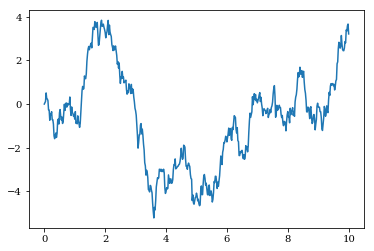

In [10]:
# Total simulation time
T=10.0

# Number of time steps and time interval dt
nt=500
dt=T/nt

# Diffusion coefficient
alpha=2.0

# Particle positions and initial condition
t = np.arange(0,T+dt,dt)
x = np.empty(nt+1)
x[0]=0

# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1)

plt.plot(t,x)

Ce code implémente l'évolution dans le temps de la position d'une molécule.

/home/damien/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


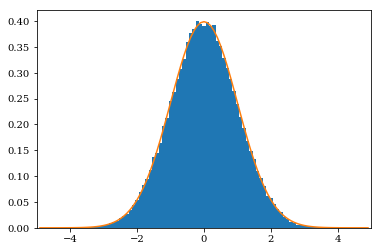

In [11]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000

# We set mu=0
sigma = 1.0
x0 = np.random.normal(loc=0,scale=sigma,size=npart)


# Generate bins centered around 0
binwidth=0.1
bins=np.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
plt.xlim(-5,5)
plt.hist(x0,bins,normed=True);
plt.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigma**2))/np.sqrt(2*np.pi*sigma**2))

Ce code initialise la position de départ des molécules qui vont être diffusées.

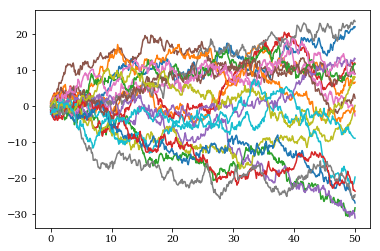

In [12]:
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,npart)

for i in range(20):
    plt.plot(t,x[:,i])

Ce code implémente l'évolution dans le temps de la position de plusieurs molécules. Ce graphique montre bien un phénomène de diffusion.

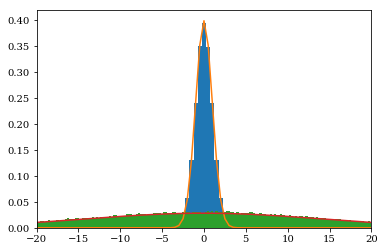

In [13]:
# Generate bins centered around 0
binwidth=0.5
bins=np.arange(-50,50,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
plt.xlim(-20,20)
plt.hist(x0,bins,normed=True);
plt.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigma**2))/np.sqrt(2*np.pi*sigma**2))

# plot a histrogram for verification
plt.hist(x[nt],bins/2,normed=True);

sigmat2=2*alpha*T+sigma**2
plt.plot(bin_centers, np.exp(-bin_centers**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))

Comparaison de la distribution des positions initiale et finale des molécules. Le fait que la gaussienne se soit applatie est bien le signe d'une diffusion.

### 3.1 Ajout d'une contribution systématique au déplacement

Dans ce cas, l'équation du modèle de diffusion est la même à l'exception de la partie aléatoire qui est 

$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

ou $c$ est une constante. Dans cette équation on voit que le déplacement est donné par une contribution systématique ainsi qu'une contribution aléatoire.

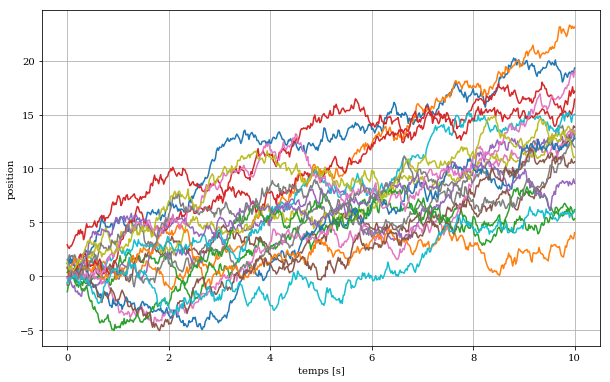

In [14]:
#Assignation des constantes
T=10.0
nt=500
dt=T/nt
alpha=2.0
c=1.5
mu = 0
sigma = 1
N = 100000

#Conditions initiales
t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,N])
x[0] = np.random.normal(mu,sigma,N)


#évolution dans le temps de la position
for i in range(nt):
    x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)

fig, ax = plt.subplots(figsize=(10,10/1.618))
plt.grid()
for i in range(20):
    ax.plot(t,x[:,i])
ax.set_xlabel("temps [s]")
ax.set_ylabel("position")
plt.show()

Ici avec le paramètre $c=1.5$, on voit clairement un décalage systématique de la position vers les $x$ positifs. Pour voir plus clairement ce qu'il se passe on peut comparer les histogrammes des positions des particules avant et après la diffusion.

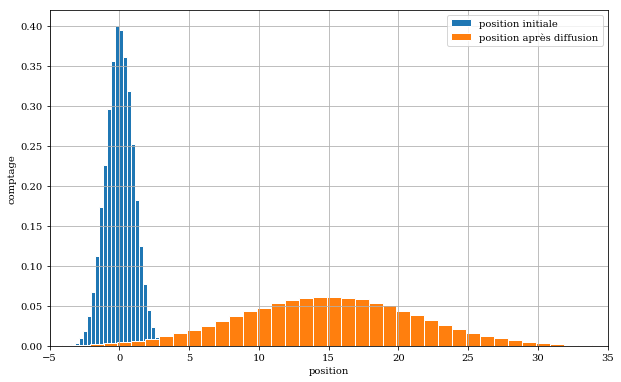

In [15]:
fig, ax = plt.subplots(figsize=(10,10/1.618))
bins = np.arange(np.min(x[-1]),np.max(x[-1]),1)
plt.grid()
plt.hist(x[0], bins=bins/3.5, density=True, label="position initiale",ec="w")
plt.hist(x[-1], bins=bins, density=True, label="position après diffusion",ec="w")
ax.set_xlabel("position")
ax.set_ylabel("comptage")
ax.set_xlim(-5,35)
plt.legend()
plt.show()

Comme dans le cas précédent, on voit que la distribution finale est une gaussienne qui s'est applatie, ceci indique bien un phénomène de diffusion mais dans ce cas ci, on voit que les deux distributions ce sont décalées. Pour comprendre ce qu'il s'est passé, calculons la moyenne des deux distributions gaussiennes.

In [16]:
meanI = np.mean(x[0])
meanF = np.mean(x[-1])

print("Moyenne de la position initiale:", meanI)
print("Moyenne de la position finale:", meanF)

Moyenne de la position initiale: -0.00010751973334149762
Moyenne de la position finale: 14.984207071386725


On constate un décalage d'environ 15m dans la position de la moyenne des positions. Ce chiffre s'explique parfaitement en comparant ce modèle de diffusion par rapport à notre précédent modèle. On voit que si la constante $c$ est fixée à 0, on retrouve notre précédent modèle de diffusion. En fait, fixer $c=0$ revient à mettre la composante systématique du déplacement à 0. Donc le déplacement de la moyenne qu'on s'attend à voir doit correspondre aux déplacement systématique, c'est-à-dire

$$
\mu = \int_0^t c dt = 15 \ \mbox{dans notre cas.}
$$

Il est alors possible de donner les distributions initiales et finales de façon analytique.

$$
p_i(x)=\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac12 (\frac{x-\mu}{\sigma})^2} = \frac{1}{ \sqrt{2\pi}} e^{-\frac12 ({x})^2} \ \mbox{et}$$


$$
p_f(x) = \frac{1}{\sigma_f \sqrt{2\pi}} e^{-\frac12 \left(\frac{x-\mu_f}{\sigma_f}\right)^2}
$$

avec

$$
\mu_f = \int_0^t c dt - \mu_i
$$

et

$$
\sigma_f^2 = 2\alpha t+\sigma_i^2
$$

On peut comparer ces résultats avec les histogrammes.

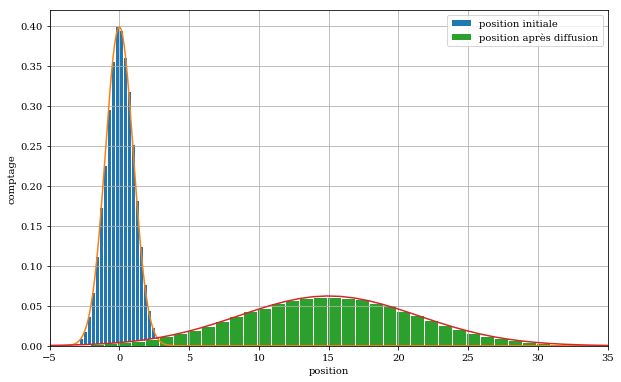

In [17]:
#implémentation des moyennes et écart-types finaux.
muf = c*T - mu
sigmat2=2*alpha*T+sigma**2

#Histogrammes
fig, ax = plt.subplots(figsize=(10,10/1.618))
bins = np.arange(np.min(x[-1]),np.max(x[-1]),1)
aa = np.linspace(np.min(x[-1]),np.max(x[-1]),500)
plt.grid()
plt.hist(x[0], bins=bins/3.5, density=True, label="position initiale",ec="w")
plt.plot(aa, np.exp(-aa**2/(2.0*sigma**2))/np.sqrt(2*np.pi*sigma**2))
plt.hist(x[-1], bins=bins, density=True, label="position après diffusion",ec="w")
plt.plot(bins, np.exp(-(bins-muf)**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2))
ax.set_xlabel("position")
ax.set_ylabel("comptage")
ax.set_xlim(-5,35)
plt.legend()
plt.show()

Le résultat est concordant avec les deux histogrammes.

### 3.2 Ajout d'un terme de "friction".

Dans ce cas le déplacement est donné par

$$
dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}
$$

où $\gamma$ est un coefficient de friction.
Regardons l'évolution de la position au cours du temps.

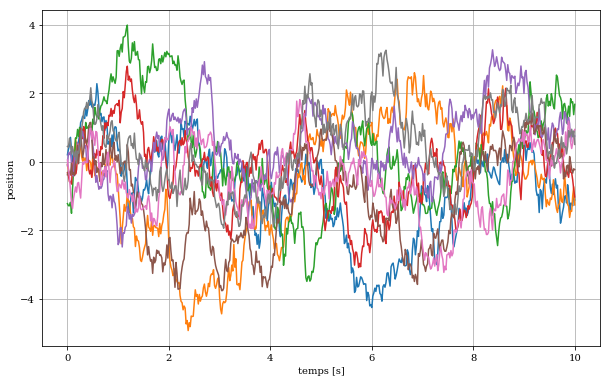

In [18]:
#Définition des constantes.
T=10.0
nt=500
dt=T/nt
alpha=2.0
gamma=1
mu = 0
sigma = 1
N = 100000

#Conditions initiales
t = np.arange(0,T+dt,dt)
x = np.empty([nt+1,N])
x[0] = np.random.normal(mu,sigma,N)


#évolution dans le temps de la position
for i in range(nt):
    x[i+1]=x[i]-gamma*x[i]*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)

fig, ax = plt.subplots(figsize=(10,10/1.618))
plt.grid()
for i in range(8):
    ax.plot(t,x[:,i])
ax.set_xlabel("temps [s]")
ax.set_ylabel("position")
plt.show()

On ne voit pas de variation claire de la distribution des positions sur ce graphique. Regardons les histogrammes des distributions initiales et finales.

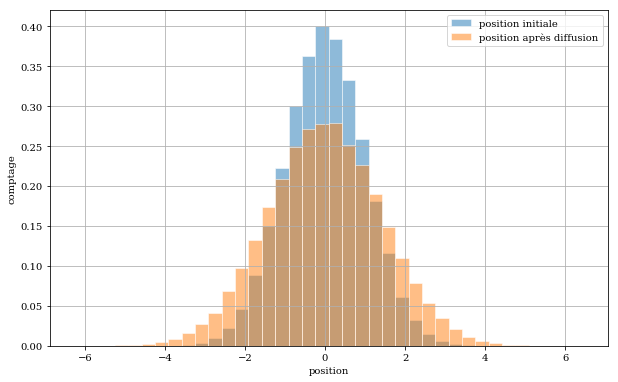

In [19]:
fig, ax = plt.subplots(figsize=(10,10/1.618))
bins = np.arange(np.min(x[-1]),np.max(x[-1]),1/3)
plt.grid()
plt.hist(x[0], bins=bins, density=True, label="position initiale",ec="w",alpha=0.5)
plt.hist(x[-1], bins=bins, density=True, label="position après diffusion",ec="w",alpha=0.5)
ax.set_xlabel("position")
ax.set_ylabel("comptage")
plt.legend()
plt.show()

Ces histogrammes montrent qu'il y a diffusion mais cette diffusion est moins forte qu'avant. L'histogramme des positions finale est beaucoup moins applatit que dans le premier modèle (sans terme de friction).
Regardons si la distribution est stable au cours du temps.

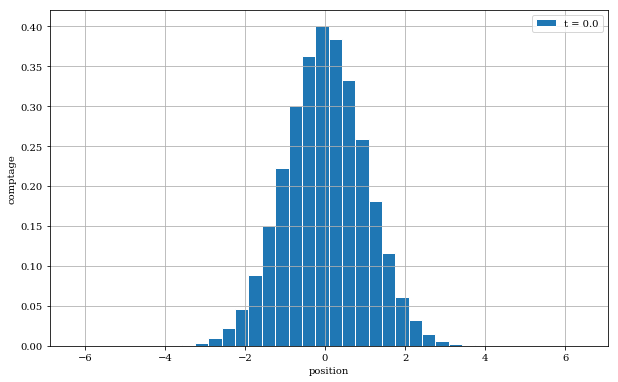

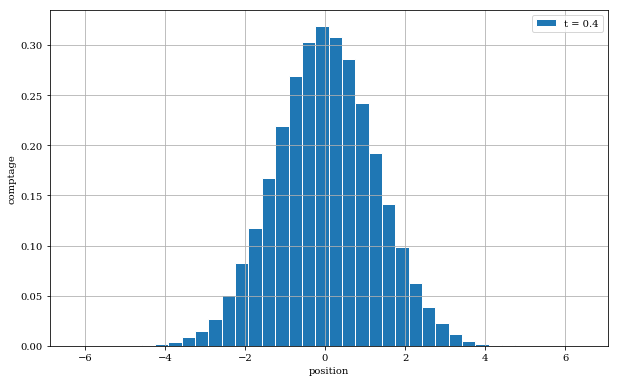

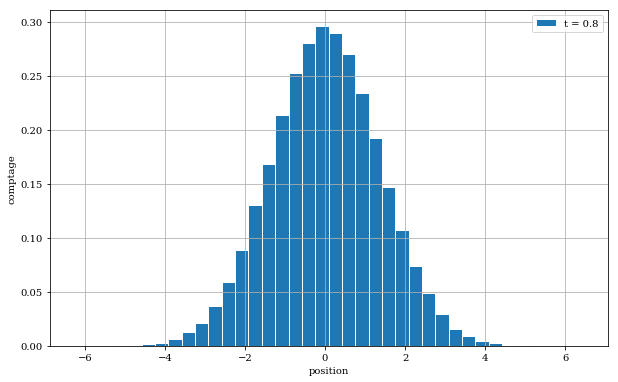

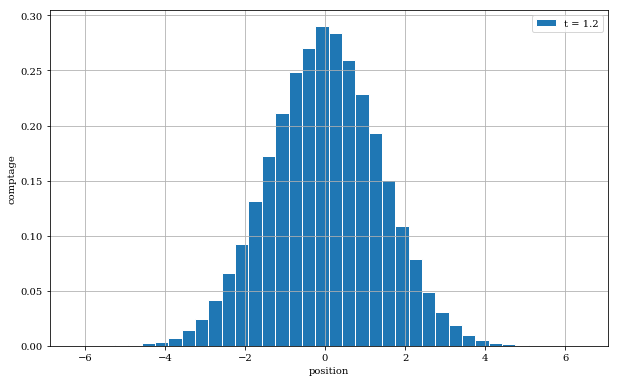

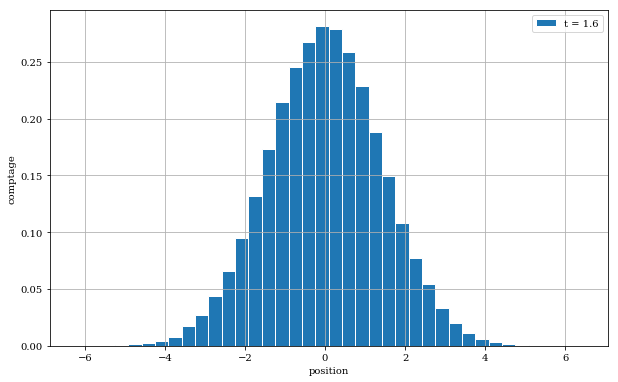

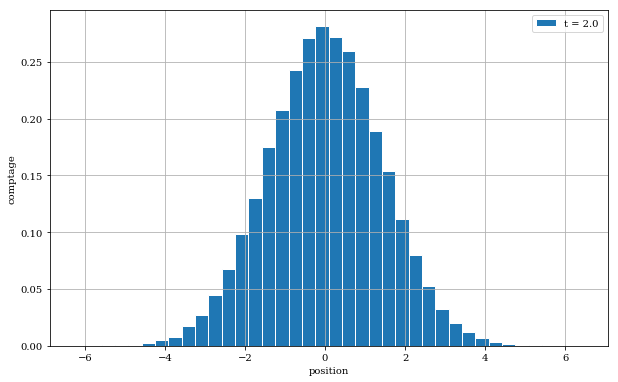

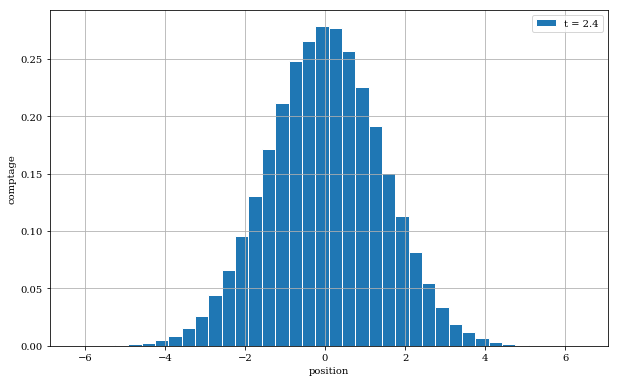

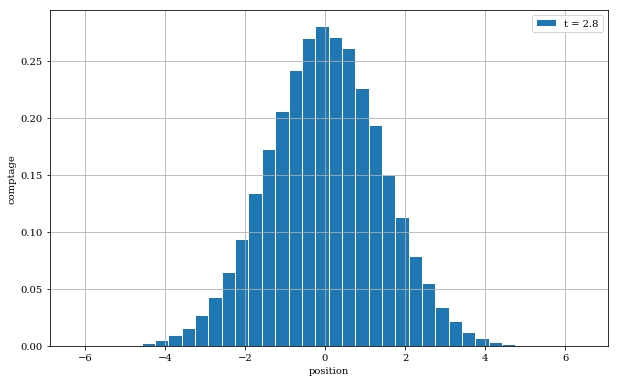

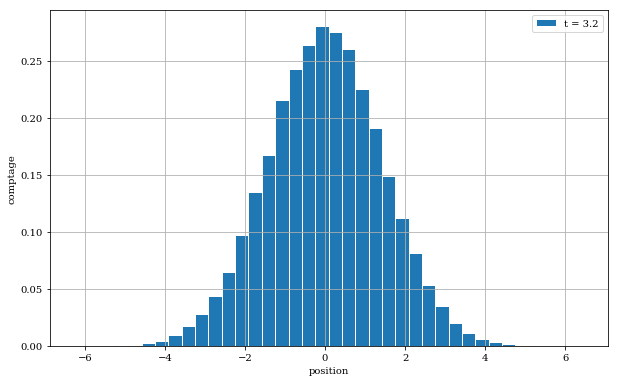

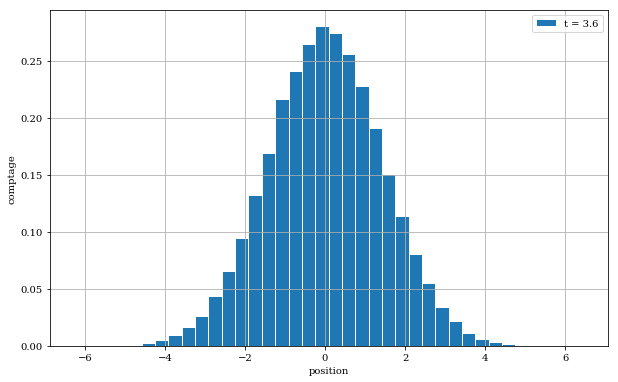

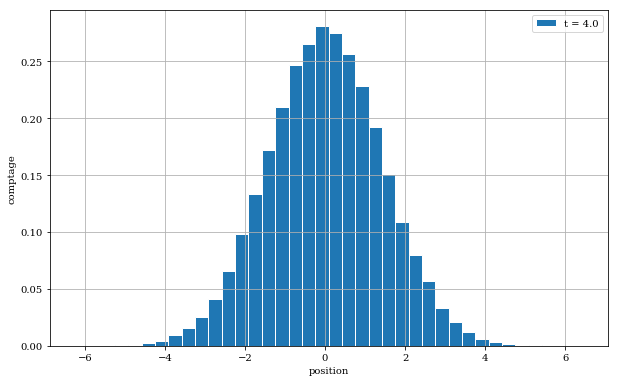

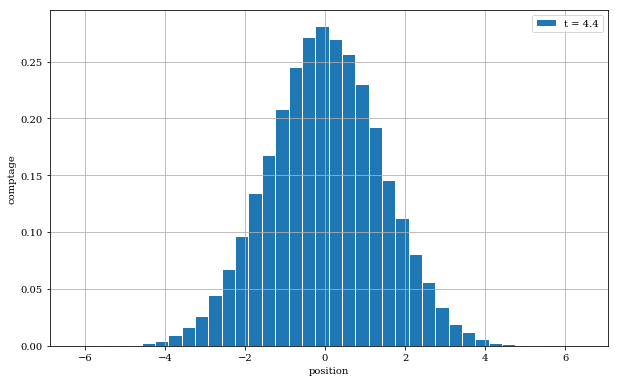

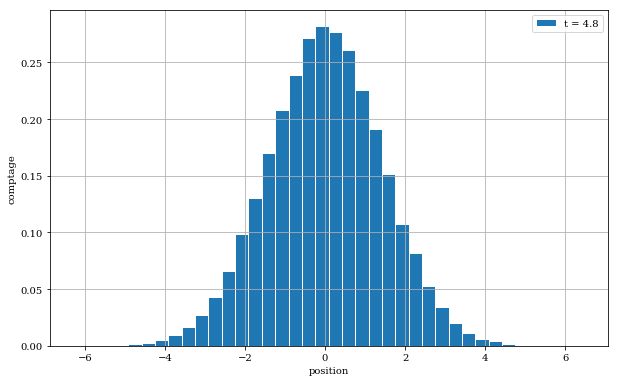

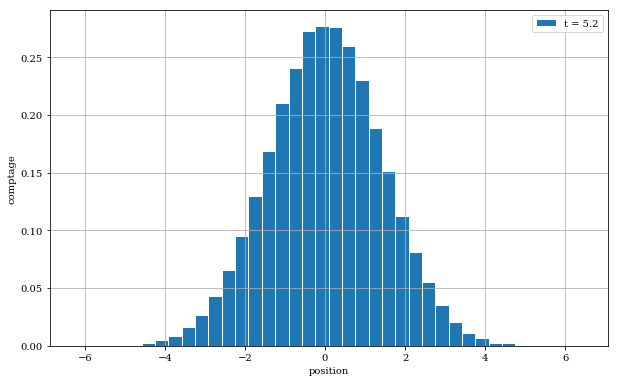

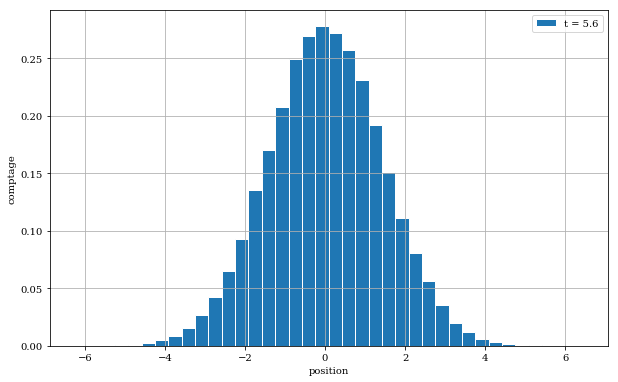

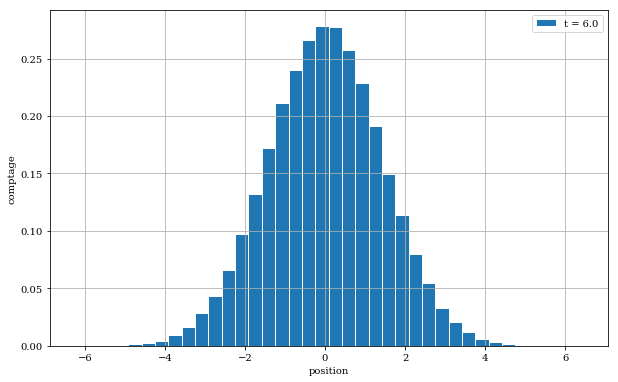

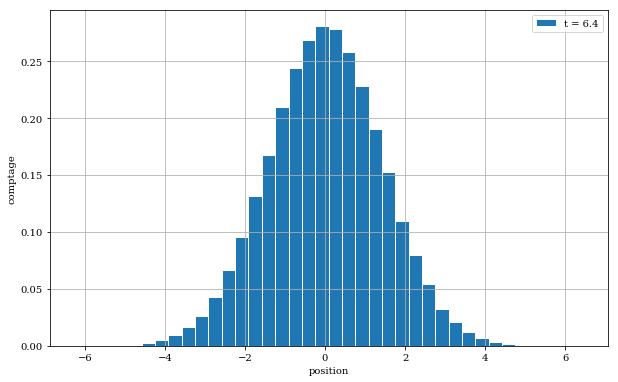

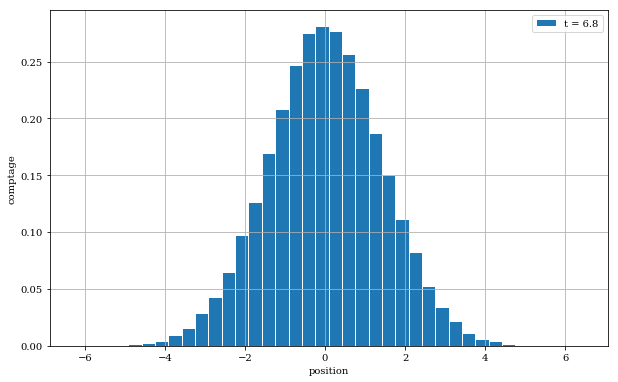

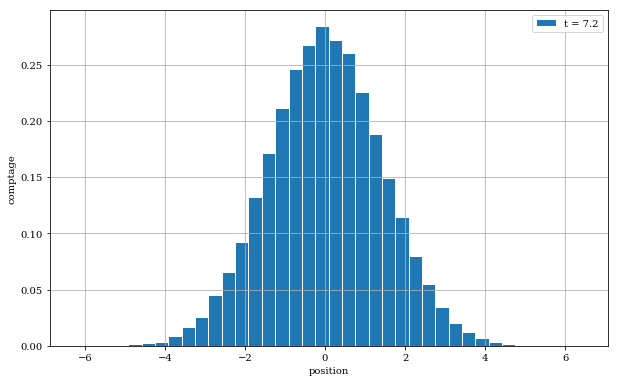

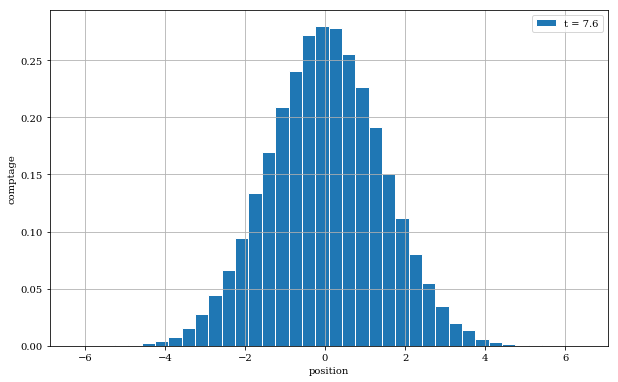

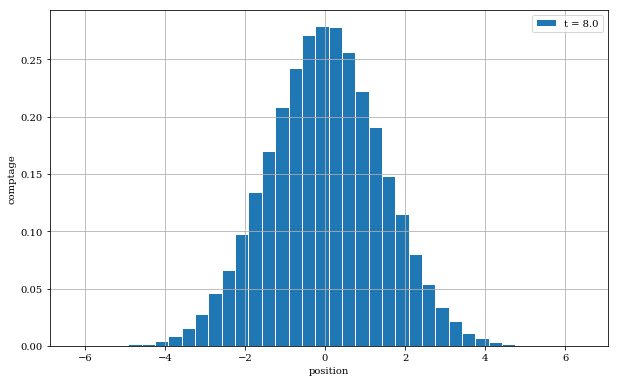

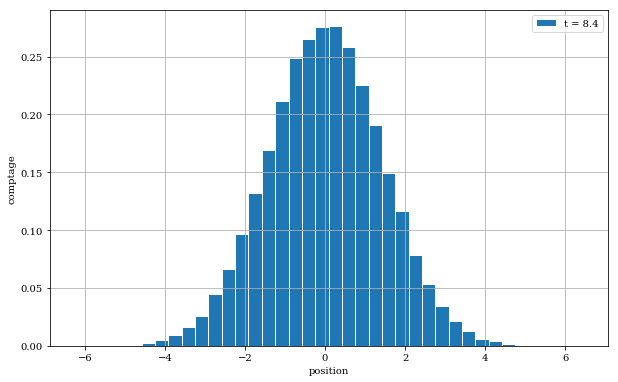

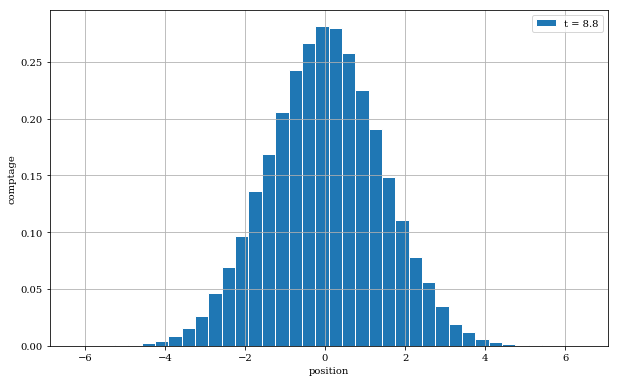

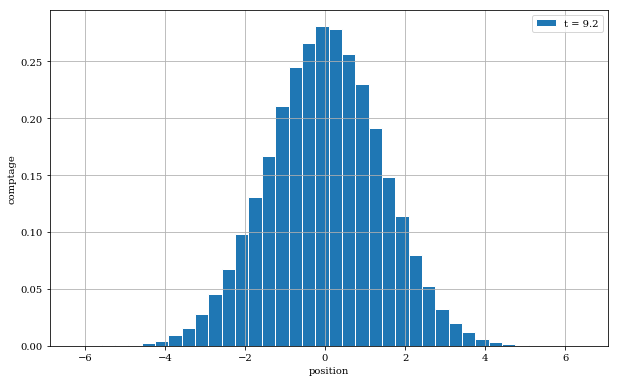

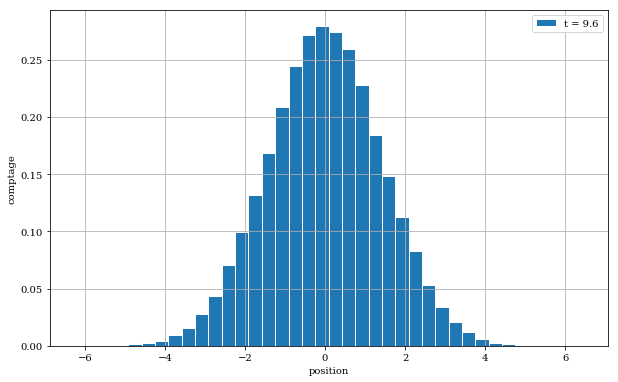

In [20]:
for f in range(0,nt,20):
    fig, ax = plt.subplots(figsize=(10,10/1.618))
    bins = np.arange(np.min(x[-1]),np.max(x[-1]),1/3)
    plt.grid()
    plt.hist(x[f], bins=bins, density=True, label="t = %.1f"%(f*dt),ec="w",alpha=1)
    ax.set_xlabel("position")
    ax.set_ylabel("comptage")
    plt.legend()
    plt.show()

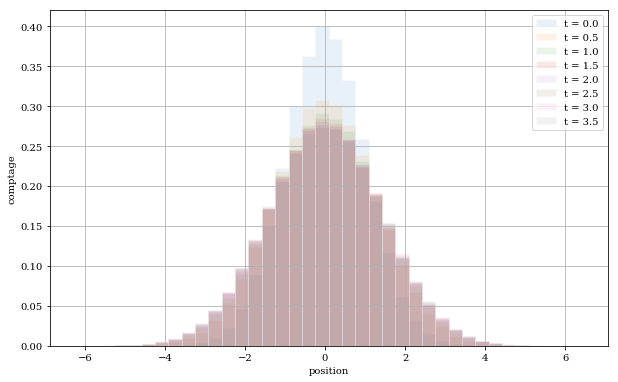

In [21]:
fig, ax = plt.subplots(figsize=(10,10/1.618))
bins = np.arange(np.min(x[-1]),np.max(x[-1]),1/3)
plt.grid()
for f in range(0,200,25):
    plt.hist(x[f], bins=bins, density=True, label="t = %.1f"%(f*dt),ec="w",alpha=0.1)
ax.set_xlabel("position")
ax.set_ylabel("comptage")
plt.legend()
plt.show()

En regardant ces distributions, on voit qu'elle commencent à se stabiliser vers $t=1.5s$. On a donc bien une distribution stable à $t \to \infty$.

## 4. The Ising Model

Le modèle d'Ising décrit l'interaction d'un dipole avec ses premiers voisins. Dans un système l'énergie est donnée par

$$
E=-J\sum_{pairs(i,j)} s_i s_j,
$$

afin de résoudre les challenges, on utilisera l'algoritme Metropolis. Cet algorithme consiste à choisir un dipole aléatoire et l'inverser en suivant la probabilité 

$$
p_{\rm flip}=e^{-\beta\Delta E}.
$$

Pour le challenge, on reprend les fonctions du MOOC afin de faire des graphiques en variant le paramètre $\alpha$.
Je commence par importer les conditions initiales "initial_state.npy".

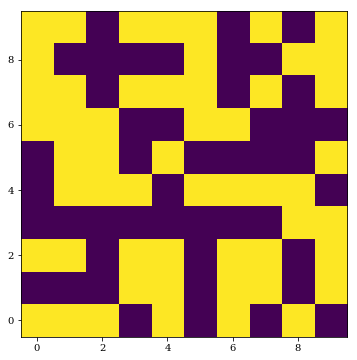

In [22]:
nx=10
ny=10

# Initial spins at each site
sp = np.load('initial_state.npy')

plt.figure(figsize=(6,6))
plt.imshow(sp,interpolation="none",origin='lower')

Maintenant on fait une fonction qui renvoie l'énergie d'une configuration comme celle donnée dans le MOOC.

In [23]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

Enfin, définissons une fonction qui implémente l'algorithme Metropolis sur une configuration. De nouveau on reprend la fonction donnée dans le MOOC.

In [24]:
def metropolis_at_site(sp,alpha,ix,iy):
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if np.less_equal(np.random.random_sample(),np.exp(-(energy_if_site_flipped-energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]
        
    return sp[ix,iy]

On implémente une fonction qui crée une séquence de configuration en renversant les orienation des spins à des coordonnées aléatoires. On reprend celle du MOOC.

In [25]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    states = np.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=np.random.randint(0,nx)
            iy=np.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [26]:
#Définition des paramètres
NMC=100
alpha=0
State = []
while alpha<=1:
    sstate = ising_model_metropolis(sp, NMC, nx, ny, alpha)
    State.append(sstate)
    alpha+=0.1

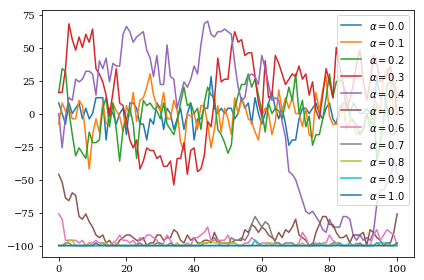

In [27]:
plt.figure()
for i in range(len(State)):
    plt.plot(State[i].sum(axis=(1,2)),label=r'$\alpha=%.1f$'%(0.1*i))
plt.legend()
plt.tight_layout()

# Sources.

Le MOOC : [**"Practical Numerical Methods with Python"**](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/about)

Documents NumPy : [**"NumPy Reference"**](https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html)

Wikipedia Box-Muller : **https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform**

Matplotlib : **https://matplotlib.org/**